**PIXEL INTERPOLATION**

Pixel interpolation is a technique used to estimate the intensity values of new pixels when enlarging, reducing, or rotating an image.

Example case:
When enlarging an image from a×a to b×b, it is necessary to calculate the values at the new pixel positions that do not exist in the original image. Interpolation helps fill in these values so that the result appears natural.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
def read_image_manual(path):
    img = mpimg.imread(path)
    if img.dtype == np.float32 or img.dtype == np.float64:
        img = (img * 255).astype(np.uint8)
    if img.ndim == 3:
        gray = (0.2989 * img[...,0] + 0.5870 * img[...,1] + 0.1140 * img[...,2]).astype(np.uint8)
        return img, gray
    else:
        return img, img

In [ ]:
def bilinear_interpolation(img, scale_x, scale_y):
    src_h, src_w = img.shape
    dst_h = int(src_h * scale_y)
    dst_w = int(src_w * scale_x)

    dst_img = np.zeros((dst_h, dst_w), dtype=np.uint8)

    for y in range(dst_h):
        for x in range(dst_w):
            src_x = x / scale_x
            src_y = y / scale_y

            x0 = int(np.floor(src_x))
            x1 = min(x0 + 1, src_w - 1)
            y0 = int(np.floor(src_y))
            y1 = min(y0 + 1, src_h - 1)

            dx = src_x - x0
            dy = src_y - y0

            top = (1 - dx) * img[y0, x0] + dx * img[y0, x1]
            bottom = (1 - dx) * img[y1, x0] + dx * img[y1, x1]
            pixel = (1 - dy) * top + dy * bottom

            dst_img[y, x] = int(pixel)

    return dst_img

In [ ]:
image_path = 'butterfly.jpg'


In [ ]:
img_rgb, img_gray = read_image_manual(image_path)

In [ ]:
img_scaled = bilinear_interpolation(img_gray, scale_x=2.0, scale_y=2.0)

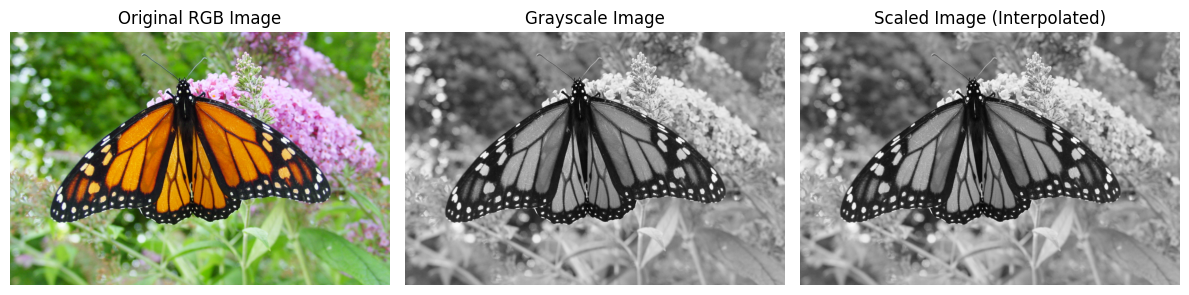

In [ ]:
plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
plt.imshow(img_rgb)
plt.title("Original RGB Image")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(img_gray, cmap='gray', vmin=0, vmax=255)
plt.title("Grayscale Image")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(img_scaled, cmap='gray', vmin=0, vmax=255)
plt.title("Scaled Image (Interpolated)")
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
print("Original shape:", img_gray.shape)
print("Interpolated shape:", img_scaled.shape)


Original shape: (1200, 1800)
Interpolated shape: (2400, 3600)
